## StackOverFlow Developer Survey Analysis [Simplified version]

## OVERVIEW

As the business world adapts to the massive disrutption of internet and the consumer epxectations driven by unleashed by the first movers and innovators in Tech, DATA SCIENTISTS have become hightly sought after.  This has made it a very attractive career building on the customs and tools pioneered by individuals in Academic Science and Computer Programming disciplines. 

Data Science is a hot field; however, are the people doing "the best job in America" ([Glassdoor,2019](https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm)) really any different from other developers?  Lets use the annual Stack Overflow Developers Survey to try and find out.

---
### DATASET Description:

The data set is the full, cleaned results of the 2019 Stack Overflow Developer Survey, downloaded from: <https://insights.stackoverflow.com/survey>.   The survey was fielded from January 23 to February 14, 2019. The median time spent on the survey for qualified responses was 23.3 minutes.  Unfortunately, free response submissions and personally identifying information have been removed from the pubicly available data in order to protect the privacy of respondents. 

Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were onsite messaging, blog posts, email lists, Meta posts, banner ads, and social media posts. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it. This community is _highly_ biased compared with the general population.  Heavy on white males from the US.


---

## Setup

### Import and configure modules

In [1]:
import pandas as pd
from pathlib import Path
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt

# simple non-parametric stats test for null hypothesis that the distributions are the same
from scipy.stats import mannwhitneyu

# processing .py functions are in: ./src/vusualize and ./src/data 
import src.visualize as vis
import src.data as dat

In [2]:
%load_ext autoreload
%autoreload 2
%autosave 90

Autosaving every 90 seconds


In [3]:
# filter the warning for now on
#import warnings
#warnings.simplefilter("ignore", DeprecationWarning)
vis.plotSOF.plot_2col
# new way to create an ordered category
from pandas.api.types import CategoricalDtype


### Get Data 

There two files of interest are a CSV table of results, and a schema table containing the questions.   For theis analysis we'll just need the survey.csv which we will download and save to a local file re-coded by the year in case we want to look at additional years of data in the future.



In [4]:
today = datetime.today()
survey_year = 2019
# in case we want to reuse code for other years
in_file = Path.cwd() / 'data' / 'raw' / f'survey{survey_year}.csv'
# this is where our cleaned up file will put put
summary_file = Path.cwd() / 'data' / 'processed' / 'summary_{today:%b-%d-%Y}.pkl'

In [5]:
# make sure we have the data where we want it
# "dat" is my ad-hoc module for loading and processing data
dat.prepare_SOFdatabase(in_file,survey_year)


data ready at:/Users/ergonyc/Projects/Insight/Modules/DataPresentation0/data/raw/survey2019.csv


False

Here's a brief run-down of how this notebook will flow.  

---
##  OUTLINE

0. OVERVIEW
    * Context
    * Dataset & files
    * Outline (.\__self__)
1. EXPLORE & FRAME  
    * Describe the dataset 
    * Clean and simplify data
    * Derive new features 
2. RESEARCH QUESTIONS
    * Are Data Scientists a different breed of developer? 
3. SUMMARRY AND NEXT STEPS
    * So what?


---
---

# EXPLORE 

## The StackOverflow Developers Survey.

Lets have a look at what we are working with and how we can start to probe which features to look at.

In [6]:
# beware that the Respondent ids start at 1
df = pd.read_csv(in_file, index_col='Respondent')
# Print column name
df.shape

(88883, 84)

In [7]:
df.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
       'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 

In [8]:
df.head(10)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","Taught yourself a new language, framework, or ...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
9,I am a developer by profession,Yes,On

The dataframe is nice and tidy:  no empty columns, mostly self-explanatory column names, etc. Only the columns resulting from multi-selections will be tricky.  These contain strings with semicolon separated values specifying the selections.

As we can see almost  3 of every 4 respondents are Professional developers (from the column `MainBranch` which corresponds to the surveys first question).  The remaining 26% represent Students, Occational coders, Hobbiests, and retired Developers. After filtering down to include only to _PROFESSIONALS_ we will still have over 65k respondents' data to analyze.

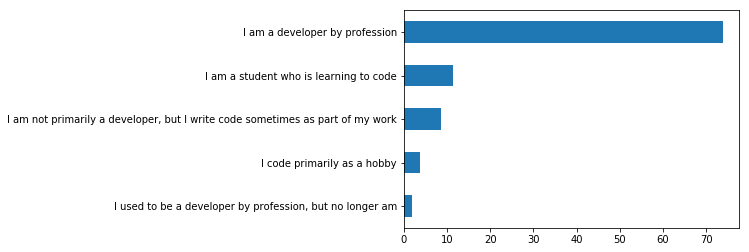

In [9]:
(100.0*df['MainBranch'].value_counts()/df.shape[0]).sort_values().plot('barh')
#df['MainBranch'].value_counts().sort_values().plot('barh')

In [10]:
# filter our respondents to be Professionals
df = df[df['MainBranch'] == 'I am a developer by profession']
print('The dataset now contains', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset now contains 65679 rows and 84 columns.


### Developer types
Beyond keeping professionals only (by dropping students, hobbyists, and other respondents), we want to find Data Scientists (DSs) as well as some other groups for comparing them against.   We'll define somewhat arbitrarily DSs as the union of Data scientists, data analysts, machine learning specialists, and academic scientists. (But _not_ data engineers).  Non-DSs are everyone else!   We also define Developers (DEVs) as all traditional developer types (i.e. front-end, back-end, full stacke, etc.).  DSs and DEVs are not mutually exclusive so we also fill out the venn diagriam between DS, DEVs and other for occational sanity checks.


In [11]:
# Create data scientist and non-data scientist subsets.
data_scientist = df['DevType'].str.contains(
    '|'.join(['data ', 'scientist']), case=False, na=False, regex=True).copy()  

# developer is "Developer, {fullstack, game or graphics, mobile, QA or test}"
#              exclude database administrator by having space after data

developer = df['DevType'].str.contains(
    'developer', case=False, na=False, regex=True).copy()  # all types of developers

In [12]:
# make some expository columns 
df.loc[:, 'isDS'] = data_scientist
df.loc[:, 'isDev'] = developer
df.loc[:, 'notDS'] = ~data_scientist
df.loc[:, 'DSonly'] = data_scientist & ~developer
df.loc[:, 'DSandDev'] = data_scientist & developer
df.loc[:, 'otherDev'] = ~data_scientist & ~ developer
df.loc[:, 'DSorNOT'] = np.nan
# maybe this is a better "feature"
df.loc[data_scientist,'DSorNOT'] = 1.0
df.loc[~data_scientist,'DSorNOT'] = 0.0

df[['isDS','notDS','isDev','DSonly','DSandDev','otherDev','DSorNOT']].agg(['mean','sum'])


,isDS,notDS,isDev,DSonly,DSandDev,otherDev,DSorNOT
mean,0.122672,0.877328,0.943787,0.019808,0.102864,0.036404,0.122672
sum,8057.000000,57622.000000,61987.000000,1301.000000,6756.000000,2391.000000,8057.000000


### categorical variables

In [13]:
# convert dtypes to categories for the features we want to analyze...
convert_to_cat = ['MainBranch', 'Trans', 'Ethnicity', 'Dependents', 'Student', 'UndergradMajor',
                  'Employment',  'OrgSize','CareerSat', 'BlockchainOrg', 'OpSys', 'OpenSourcer',
                  'MgrIdiot', 'MgrMoney', 'MgrWant', 'BlockchainIs', 'BetterLife', 'ITperson', 
                  'OffOn', 'ScreenName', 'SocialMedia', 'Extraversion',
                  'SurveyLength', 'SurveyEase', 'Hobbyist']

for col_name in convert_to_cat:
    if(df[col_name].dtype == 'object'):
        df[col_name] = df[col_name].astype('category')
        # df.loc[:,col_name] = df[col_name].cat.codes  # could do this to make everything ready for ML

Most of our columns are derived from choosing among a limited number of choices.  Hence, they are categorical.  We'll want to keep the ordering of naturally heirarchal features, such as education levels.

In [14]:
# Convert these to ordered categories
# Education
edlevel_cat = CategoricalDtype(['I never completed any formal education',
                                'Primary/elementary school',
                                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                                'Some college/university study without earning a degree',
                                'Associate degree',
                                'Bachelor’s degree (BA, BS, B.Eng., etc.)',
                                'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
                                'Professional degree (JD, MD, etc.)',
                                'Other doctoral degree (Ph.D, Ed.D., etc.)'], ordered=True)
df['EdLevel'] = df.EdLevel.astype(edlevel_cat)

# OpenSource . Higher, same lower
opensource_cat = CategoricalDtype(['OSS is, on average, of HIGHER quality than proprietary / closed source software',
                                   'The quality of OSS and closed source software is about the same',
                                   'OSS is, on average, of LOWER quality than proprietary \
                                       / closed source software', ], ordered=True)
df['OpenSource'] = df.OpenSource.astype(opensource_cat)

# career satisfaction / job satisfaction
careersat_cat = CategoricalDtype(['Very dissatisfied',
                                  'Slightly dissatisfied',
                                  'Neither satisfied nor dissatisfied',
                                  'Slightly satisfied',
                                  'Very satisfied'], ordered=True)
df['CareerSat'] = df.CareerSat.astype(careersat_cat)

jobsat_cat = CategoricalDtype(['Very dissatisfied',
                               'Slightly dissatisfied',
                               'Neither satisfied nor dissatisfied',
                               'Slightly satisfied',
                               'Very satisfied'], ordered=True)
df['JobSat'] = df.JobSat.astype(jobsat_cat)

# competence
impsyn_cat = CategoricalDtype(['Far below average',
                               'A little below average',
                               'Average',
                               'A little above average',
                               'Far above average'], ordered=True)
df['ImpSyn'] = df.ImpSyn.astype(impsyn_cat)

# clean Gender & Sexuality from multi-selects.
other = df['Gender'].str.contains(';', case=False, na=False, regex=True).copy()
df.loc[other, 'Gender'] = 'Other'
df.Gender = df['Gender'].astype('category')

other = df['Sexuality'].str.contains(';', case=False, na=False, regex=True)
df.loc[other, 'Sexuality'] = 'Other'
df.Sexuality = df['Sexuality'].astype('category')

In [15]:
print('The dataset contains', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset contains 65679 rows and 91 columns.


# Research Questions

In order to explore whether the cohort of Data Scientists are different from traditional Developers lets explore their DEMOGRAPHICS, their SKILLS&TOOLS, and some ATTITUDES/CULTURAL probes. 

We will focus on the the DEMOGRAPHIC, ATTITUDANAL, as well as some WORK and CODING relate for further analysis.

The motivation behind this analysis is to explore how data scientists compare with non-data scientist developers ("non-data scientists"). Consequently, we set out to answer the following questions:

1. **Are there demographic differences?**  Hypothesis:  higher educated and more likely from math/science than computer/tech.  Intuition also dictates that DS are younger and less experienced.
2. **Are their attitudes different?** 
3. **Are their skills, tools, and work situations different?**
4. **Can we predict if a developer professional developer is a Data Scientist?**        

We'll enumerate some lists of our columns of interest for reference, and for filtering.  We'll also define a few functions to simplify plotting and processing.

In [16]:
# df.columns
demographic_cols = ['MainBranch', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
                    'Dependents', 'Country', 'Student', 'EdLevel', 'UndergradMajor']

attitude_cols = ['ImpSyn', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobFactors',
                 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',  'SocialMedia', 'Extraversion',
                 'ScreenName', 'OpenSource']

work_cols = ['ConvertedComp',  'WorkWeekHrs' 'Employment', 'OrgSize']

skills_cols = ['YearsCode', 'Age1stCode', 'YearsCodePro', 'OpenSourcer', 'DevType',  'LanguageWorkedWith',
               'LanguageDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'FizzBuzz',
               'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',   'PlatformDesireNextYear',
               'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear']

misc_cols = ['Hobbyist', 'SurveyLength', 'SurveyEase']

stackoverflow_cols = ['SOVisit1st', 'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime',
                      'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent']

# added columns
types_cols = ['isDS', 'notDS', 'isDev', 'DSonly', 'DSandDev', 'otherDev']

# drop all of these
drop_cols = ['JobSeek', 'LastHireDate', 'LastInt', 'ResumeUpdate',
             'CompTotal', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
             'WorkPlan', 'WorkRemote', 'WorkLoc', 'CodeRev', 'CodeRevHrs', 'UnitTests',
             'PurchaseHow', 'PurchaseWhat',
             'EduOther', 'SOVisit1st', 'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime',
             'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent']
# 'WorkChallenge'
df = df.drop(drop_cols, axis=1)

----
## Q1: Are there demographic differences that set Data Scientists apart?  

**Hypothesis:**  *DS are higher educated and more likely from math/science than computer/tech.*  Intuition also dictates that DS are younger and less experienced.

### Demographic.1 - education levels and major
Note: we will also simplify our categories for simplicity

In [17]:
# simple method comparing strings... could also use ordering...
advanced = df['EdLevel'].isin(['Other doctoral degree (Ph.D, Ed.D., etc.)',
                               'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
                               'Professional degree (JD, MD, etc.)'])

college = df['EdLevel'].isin(['Associate degree',
                              'Bachelor’s degree (BA, BS, B.Eng., etc.)',
                              'Some college/university study without earning a degree'])

grade = df['EdLevel'].isin(['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                            'Primary/elementary school',
                            'I never completed any formal education'])
no_answer = df['EdLevel'].isnull()
# create ordered category
edlevel_simple_cat = CategoricalDtype(['Grade',
                                       'College',  # 'N/A'
                                       'Advanced'], ordered=True)
df.loc[:, 'Education'] = np.nan
df.loc[advanced, 'Education'] = 'Advanced'
df.loc[college, 'Education'] = 'College'
df.loc[grade, 'Education'] = 'Grade'
# now make it an ordered category
df.loc[:, 'Education'] = df.Education.astype(edlevel_simple_cat)

df['Education'].value_counts(sort=False)

Grade        4016
College     42115
Advanced    18295
Name: Education, dtype: int64

ANSWER:  Data Scientists are more are more likely to have advanced degrees than non-Data Scientists, notably PhDs.  But things are a little complicated. So lets aggregate to simplify the categories a bit.

isDS,False,True
EdLevel,,
I never completed any formal education,0.462020,0.642722
Primary/elementary school,0.515126,0.504096
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",5.459277,3.642092
Some college/university study without earning a degree,11.828433,8.746062
Associate degree,3.453647,2.596093
"Bachelor’s degree (BA, BS, B.Eng., etc.)",52.033067,40.176434
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",23.552424,33.156900
"Professional degree (JD, MD, etc.)",1.368360,1.487083
"Other doctoral degree (Ph.D, Ed.D., etc.)",1.327645,9.048519


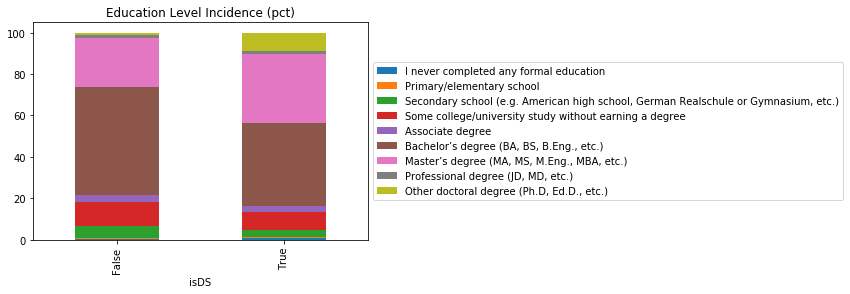

In [18]:
# plot EdLevel and Education summaries for DS and non-DS
title_text = 'Education Level Incidence (pct)'
df_plot = df.groupby(['EdLevel', 'isDS'])['isDS'].count().unstack('EdLevel').fillna(0).apply(lambda r: 100*r/r.sum(), axis=1)
#test5.apply(lambda x:100 * x / float(x.sum()))
df_plot.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title(title_text)
df_plot.T


The incidence of Data Scientist with advanced degrees is 17 percentage points higher than non Data Scientists.

College    -15.796559
Grade       -1.647514
Advanced    17.444073
Name: Education, dtype: float64

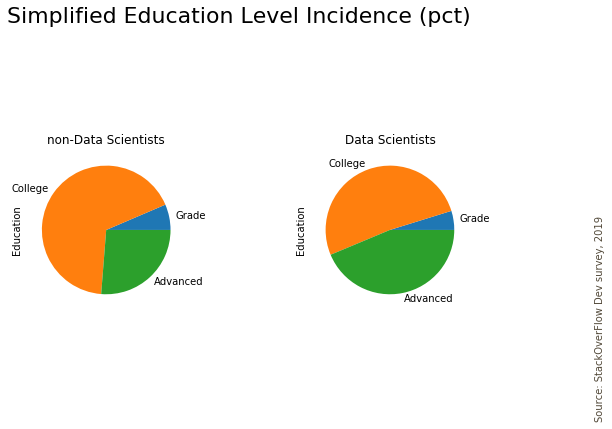

In [19]:
# plot EdLevel and Education summaries for DS and non-DS

title_text = 'Simplified Education Level Incidence (pct)'
xlimit = {0, 70}
xlabel_text = 'percent'
ylabel_text = 'educatation'
df_plot1 = 100*df.Education[df['notDS']].value_counts('mean', sort=False)
df_plot2 = 100*df.Education[df['isDS']].value_counts('mean', sort=False)
df_plot2 = df_plot2[df_plot1.index]
vis.plot_2col(df_plot1, df_plot2, title_text, xlimit,
          xlabel_text, ylabel_text, 'pie')
# df_plot1.unstack(-1).plot.barh()
# df_plot1
(df_plot2-df_plot1).sort_values()

isDS,False,True
UndergradMajor,,
"A business discipline (ex. accounting, finance, marketing)",1.821428,2.453741
"A health science (ex. nursing, pharmacy, radiology)",0.233614,0.388844
"A humanities discipline (ex. literature, history, philosophy)",1.977170,1.367659
"A natural science (ex. biology, chemistry, physics)",2.816661,8.608206
"A social science (ex. anthropology, psychology, political science)",1.426374,1.769912
"Another engineering discipline (ex. civil, electrical, mechanical)",7.340791,8.098686
"Computer science, computer engineering, or software engineering",67.290270,59.761330
"Fine arts or performing arts (ex. graphic design, music, studio art)",1.652390,0.724055
I never declared a major,1.154774,0.683829


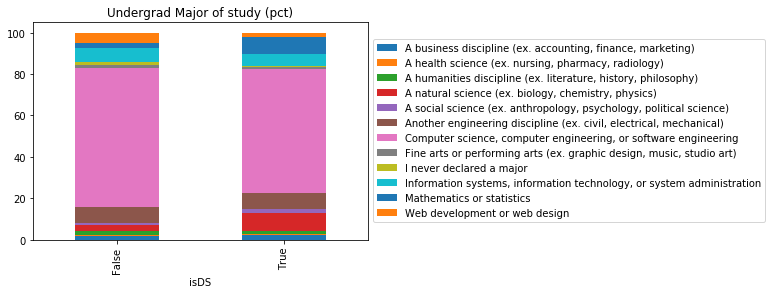

In [20]:
# plot UndergradMajor and Major summaries for DS and non-DS
df.loc[:, 'Major'] = np.nan

computer_tech = df['UndergradMajor'].isin(['Computer science, computer engineering, or software engineering',
                                           'Web development or web design',
                                           'Information systems, information technology, or system administration'])

math_sci = df['UndergradMajor'].isin(['Mathematics or statistics',
                                      'Another engineering discipline (ex. civil, electrical, mechanical)',
                                      'A natural science (ex. biology, chemistry, physics)'])

other = df['UndergradMajor'].isin(['A health science (ex. nursing, pharmacy, radiology)',
                                   'A business discipline (ex. accounting, finance, marketing)',
                                   'A humanities discipline (ex. literature, history, philosophy)',
                                   'A social science (ex. anthropology, psychology, political science)',
                                   'Fine arts or performing arts (ex. graphic design, music, studio art)'])


df.loc[computer_tech, 'Major'] = 'Computer/Tech'
df.loc[math_sci, 'Major'] = 'Math/Science'
df.loc[other, 'Major'] = 'Other'
#df.loc[no_answer,'EdLevel_simple'] = 'N/A'

df.loc[:, 'Major'] = df.Major.astype('category')
df['Major'].value_counts()

# plot Undergrad Major for DS and non-DS
title_text = 'Undergrad Major of study (pct)'
df_plot = df.groupby(['UndergradMajor', 'isDS'])['isDS'].count().unstack('UndergradMajor').fillna(0).apply(lambda r: 100*r/r.sum(), axis=1)
#test5.apply(lambda x:100 * x / float(x.sum()))
df_plot.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title(title_text)
df_plot.T



The percentage of Data Scientists with Math/Science degres are +12pp higher than non-Data Scientists, but the vast majority of both (almost 3/4) have computer / tech degrees.

Computer/Tech   -11.931466
Other            -0.443680
Math/Science     12.375146
Name: Major, dtype: float64

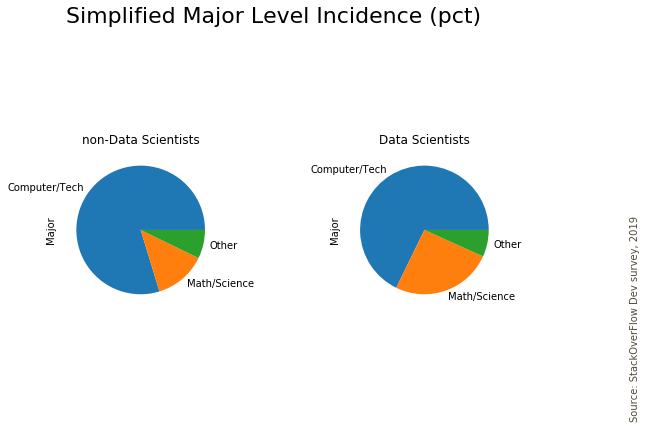

In [21]:
# plot Major summaries for DS and non-DS
title_text = 'Simplified Major Level Incidence (pct)'
xlimit = {0, 70}
xlabel_text = 'percent'
ylabel_text = 'educatation'
df_plot1 = 100*df.Major[df['notDS']].value_counts('mean', sort=False)
df_plot2 = 100*df.Major[df['isDS']].value_counts('mean', sort=False)
df_plot2 = df_plot2[df_plot1.index]
vis.plot_2col(df_plot1, df_plot2, title_text, xlimit,
          xlabel_text, ylabel_text, 'pie')

(df_plot2-df_plot1).sort_values()

----
**Hypothesis:**  *DS started coding early*

### Demographic.2 - coding experience, age, Generation, and compensation

How long have they been coding?  When did they first start?  

#### Stats: Mann-Whitney U.  
To test statistically whether we see a difference in our numerical data between DS and non-DS respondents we'll do a quick and dirty non-parametric alternative to the t-test:  the Mann-Whitney U test.  This tests whether two independent samples were drawn from a population with the same distribution. We'll choose an $\alpha =.001$ or 1/1000 as or rejection level.

In [22]:
df.loc[:, 'nYearsCode'] = pd.to_numeric(df.YearsCode.apply(dat.clean.fix_years_coding))
df.loc[:, 'nYearsPro'] = pd.to_numeric(df.YearsCodePro.apply(dat.clean.fix_years_coding))

df.groupby('isDS').nYearsCode.agg(['count', 'mean', 'median', 'sem', 'max', 'min']).T

isDS,False,True
count,57205.000000,8028.000000
mean,12.505760,14.205157
median,10.000000,11.000000
sem,0.036295,0.109687
max,55.000000,55.000000
min,0.000100,0.000100


In [96]:
df_plot1 = df.nYearsCode[~df['isDS']]
df_plot2 = df.nYearsCode[df['isDS']]

# compare samples
stat, p = mannwhitneyu(df_plot1, df_plot2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.001

if p > alpha:
    print(df_plot1.name + ' have same distribution (fail to reject H0)')
else:
    print(df_plot1.name + ' have different distribution (reject H0)')

Statistics=211703821.500, p=0.000
nYearsCode have different distribution (reject H0)


Data Scientists tend to have been coding for a long time, and have some people in the cohort who have been in professionals for a long time.  Althouth the median years as professional is the same, there average years Pro is one year higher for Data Scientists at 9 years.

In [23]:
df.groupby('isDS').nYearsPro.agg(['count', 'mean', 'median', 'sem', 'max', 'min']).T
#df.groupby('isDS')['nYearsPro'].agg(['count', 'mean', 'median', 'sem', 'max', 'min'])

isDS,False,True
count,57100.000000,8009.000000
mean,7.934979,9.152582
median,6.000000,6.000000
sem,0.030514,0.094180
max,55.000000,55.000000
min,0.000100,0.000100


In [85]:
df_plot1 = df.nYearsPro[~df['isDS']]
df_plot2 = df.nYearsPro[df['isDS']]

# compare samples
stat, p = mannwhitneyu(df_plot1, df_plot2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
    print(df_plot1.name + ' have same distribution (fail to reject H0)')
else:
    print(df_plot1.name + ' have different distribution (reject H0)')

Statistics=216675242.500, p=0.000
nYearsPro have different distribution (reject H0)


In [81]:
df.loc[:, 'nAgeCode'] = pd.to_numeric(df.Age1stCode.apply(dat.clean.fix_age1stcode))
df.groupby('isDS').nAgeCode.agg(['count', 'mean', 'median', 'sem', 'max', 'min']).T

isDS,False,True
count,57041.000000,8002.000000
mean,15.369033,14.901337
median,15.000000,15.000000
sem,0.019425,0.053720
max,85.000000,85.000000
min,4.500000,4.500000


In [86]:
df_plot1 = df.nAgeCode[~df['isDS']]
df_plot2 = df.nAgeCode[df['isDS']]

# compare samples
stat, p = mannwhitneyu(df_plot1, df_plot2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
    print(df_plot1.name + ' have same distribution (fail to reject H0)')
else:
    print(df_plot1.name + ' have different distribution (reject H0)')

Statistics=218004406.500, p=0.000
nAgeCode have different distribution (reject H0)


So its not surprising that there might be more individuals who started coding at very young ages among Data Scientists. The mean is lower than the median, which is identical between Data Scientists and non-Data Scientists at 15 years young!

 ----
**Hypothesis:**  *DS follow some generational trends*
![alt text][logo]

[logo]:
https://www.pewresearch.org/wp-content/uploads/2019/01/FT_19.01.17_generations_2019.png


In [25]:
df.loc[:, 'nAge'] = pd.to_numeric(df.Age.apply(dat.clean.fix_age))

generation_cat = CategoricalDtype(['GenZ',
                                   'Millenial',
                                   'GenX',
                                   'Boomer',
                                   'Silent',  # 'N/A'
                                   ], ordered=True)

# Apply function to subsets
df.loc[:, 'Gen'] = np.nan
df.loc[:, 'Gen'] = df.Age.apply(dat.clean.find_gen).copy()
df.loc[:, 'Gen'] = df.Gen.astype(generation_cat)

Millenial   -3.666389
GenZ        -1.530008
Boomer       0.957908
Silent       1.442091
GenX         2.796397
Name: Gen, dtype: float64

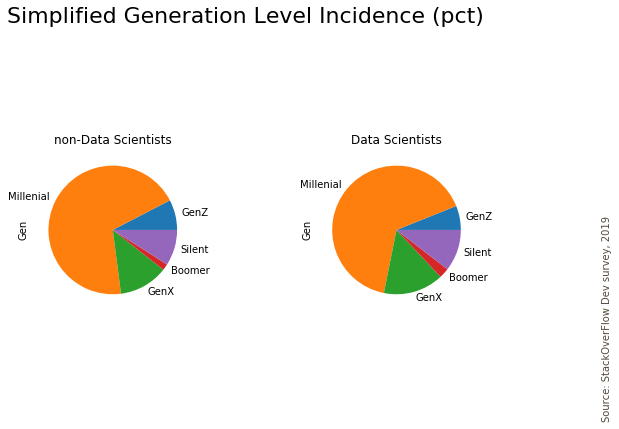

In [26]:
# plot Major summaries for DS and non-DS
title_text = 'Simplified Generation Level Incidence (pct)'
xlimit = {0, 70}
xlabel_text = 'percent'
ylabel_text = 'educatation'
df_plot1 = 100*df.Gen[df['notDS']].value_counts('mean', sort=False)
df_plot2 = 100*df.Gen[df['isDS']].value_counts('mean', sort=False)
df_plot2 = df_plot2[df_plot1.index]
vis.plot_2col(df_plot1, df_plot2, title_text, xlimit,
          xlabel_text, ylabel_text, 'pie')
(df_plot2-df_plot1).sort_values()


Although most of the respondents are Millenials, it is very interesting that our Data Scientists tend to have an older component of GenX, Boomers, and even Silent generation members.


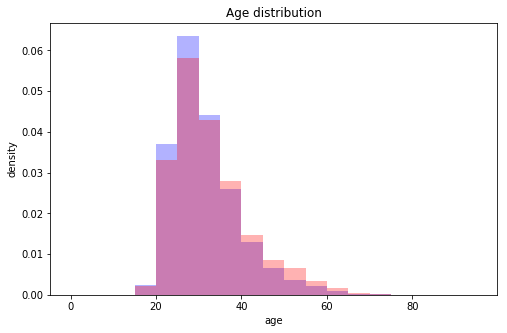

Statistics=215201314.500, p=0.000
nAge have different distribution (reject H0)


In [87]:
## AGE
fig = plt.figure(figsize=(8, 5))
ylimit = {0, .07}
xlabel_text = 'age'
ylabel_text = 'density'
df_plot1 = df.nAge[~df['isDS']]
df_plot2 = df.nAge[df['isDS']]

# Plot them as a histogram.
title_text = 'Age distribution'
plt.hist(df_plot1, density=True, color='blue',
         bins=np.arange(0, 100, 5), alpha=.3)
# Plot them as a histogram.
plt.hist(df_plot2, density=True, color='red',
         bins=np.arange(0, 100, 5), alpha=.3)
plt.title(title_text)
plt.xlabel(xlabel_text)
plt.ylabel(ylabel_text)

plt.show()

# compare samples
stat, p = mannwhitneyu(df_plot1, df_plot2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
    print(df_plot1.name + ' have same distribution (fail to reject H0)')
else:
    print(df_plot1.name + ' have different distribution (reject H0)')

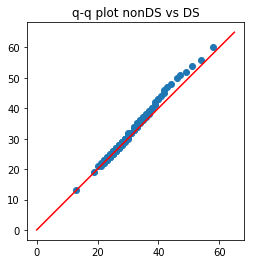

In [28]:
# percentile list
perc = [.10, .25, .50, .75, .90]

plt.scatter(x=df_plot1.quantile(np.linspace(0, 1, 100, 0)),
            y=df_plot2.quantile(np.linspace(0, 1, 100, 0)))
plt.plot([0, 65], [0, 65], color='r')
plt.title('q-q plot nonDS vs DS')
plt.gca().set_aspect('equal', adjustable='box')
fig.tight_layout()

There's clearly more older respondents in the DS group.  This can be seen as the points abouve the unity line in Q-Q plot for non-DS vs DS.  Our hypothesis that this "new" sexy field is drawing in fresh young people doesn't seem to be bearing out.  It seems more like wizened intellectuals and provessionals are finding new ways to add value through data science.

### Demographic.3 - Misc, sexuality, country of origin, gender, workweek, and compensation
    - [note: should recategorize the multi-selects as "other" ]
----
**Hypothesis:**  The data set will be heavily skewed to coders, who we already know are overrepresented by white US dudes, but Data Scientists will draw in a slightly more balanced group.


Programmers from older generations tend to be better paid.

In [29]:
df.groupby('Gen').ConvertedComp.agg(
    ['count', 'mean', 'median', 'sem', 'max', 'min'])

,count,mean,median,sem,max,min
Gen,,,,,,
GenZ,3574,67505.028819,19236.0,3701.555070,2000000.0,0.0
Millenial,37425,121506.230969,53850.0,1448.691504,2000000.0,0.0
GenX,6654,176570.177638,93492.0,3793.224584,2000000.0,0.0
Boomer,796,209459.015075,110000.0,13164.119463,2000000.0,0.0
Silent,2053,138289.154408,60000.0,6762.615024,2000000.0,0.0


In [91]:
# lets check to see if maybe we have part-timers or super-rich managers skewing the 'data
df.loc[:, 'WorkWeekH'] = df.WorkWeekHrs.copy().apply(dat.clean.fix_workweekhours)
df['WorkWeekH'].max()

comp_per_hour = df['ConvertedComp']/(df['WorkWeekH']*52)

In [31]:
# Looks like the middle 50% of people mostly work 40 hours weeks, but some extreme outliers exist...
pd.concat([df.WorkWeekH[df['notDS']].dropna().describe(percentiles=perc).rename('Hours_NotDS'),
           (df.WorkWeekH[df['isDS']].dropna().describe(percentiles=perc)).rename('Hours_DS'),
           comp_per_hour[df['notDS']].dropna().describe(percentiles=perc).rename('cmp_NotDS'),
           (comp_per_hour[df['isDS']].dropna().describe(percentiles=perc)).rename('cmp_DS')],
          axis=1)

,Hours_NotDS,Hours_DS,cmp_NotDS,cmp_DS
count,50671.000000,7050.000000,43683.000000,5967.000000
mean,40.148769,41.384865,61.974975,65.771775
std,9.725670,11.390711,141.466016,146.140083
min,4.000000,4.000000,0.000000,0.000000
10%,35.000000,30.000000,5.128205,5.043385
25%,40.000000,40.000000,13.383013,13.481643
50%,40.000000,40.000000,28.200000,28.997470
75%,42.000000,45.000000,48.241896,48.585513
90%,50.000000,50.000000,86.538462,88.528846
max,140.000000,120.000000,6410.256410,1602.564103


In [98]:
df_plot1 = df.WorkWeekH[~df['isDS']]
df_plot2 = df.WorkWeekH[df['isDS']]

# compare samples
stat, p = mannwhitneyu(df_plot1, df_plot2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
    print(df_plot1.name + ' have same distribution (fail to reject H0)')
else:
    print(df_plot1.name + ' have different distribution (reject H0)')
    

Statistics=217577053.000, p=0.000
WorkWeekH have different distribution (reject H0)


In [97]:
df_plot1 = comp_per_hour[~df['isDS']]
df_plot2 = comp_per_hour[df['isDS']]

df_plot1.name = 'comp_per_hour' 
# compare samples
stat, p = mannwhitneyu(df_plot1, df_plot2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
    print(df_plot1.name + ' have same distribution (fail to reject H0)')
else:
    print(df_plot1.name + ' have different distribution (reject H0)')
    

Statistics=229220918.500, p=0.034
comp_per_hour have same distribution (fail to reject H0)


Data Scientists actually look to be slightly older than non-DS developers. And their experience and tenure help them generate higher salaries.  It also looks like they work slighly more hours per week to generate that income, and actually have the same hourly compensation rates.

In [99]:
compStats = df.dropna().groupby('Country').ConvertedComp.agg(
    ['count', 'mean', 'median']).sort_values('median', ascending=False)
compStats = compStats[compStats['count'] > 4]
compStats.head(10)

# looks like the US has lots of "outliers" but is still the highes paid

,count,mean,median
Country,,,
United States,2188,249579.178702,110000.0
Switzerland,94,157508.478723,96545.5
Israel,48,95030.250000,95664.0
Denmark,54,114856.555556,86550.0
Norway,62,179989.322581,82975.0
Australia,204,195737.372549,79783.0
Ireland,47,205455.829787,74474.0
Canada,299,133465.023411,68705.0
United Kingdom,573,160021.467714,66078.0


Strangely, ther rare women in our dataset seem to be slighlty better paid. 1.02 cents on the doller median wage.  However, some the mean pay is slightly higer for men. For DataScientists the median wage is slightly smaller (94.46 cents on the dollar), but the average is higher!!  On _AVERAGE_ women are paid 19% more.

In [33]:
print('Gender difference in comp across all professionals:  ---v')
df.dropna().groupby('Gender').ConvertedComp.agg(
    ['count', 'mean', 'median']).sort_values('median', ascending=False)


Gender difference in comp across all professionals:  ---v


,count,mean,median
Gender,,,
"Non-binary, genderqueer, or gender non-conforming",17,270821.117647,75000.0
Woman,264,140986.678030,68372.5
Man,6503,141535.265724,65100.0
Other,22,66672.227273,57354.0


In [34]:
print('Gender difference in comp for non-data scientists:  ---v')
df[~df['isDS']].dropna().groupby('Gender').ConvertedComp.agg(
    ['count', 'mean', 'median']).sort_values('median', ascending=False)

Gender difference in comp for non-data scientists:  ---v


,count,mean,median
Gender,,,
Woman,233,136613.545064,68745.0
"Non-binary, genderqueer, or gender non-conforming",12,302231.333333,68571.0
Man,5705,140932.768449,65250.0
Other,18,61693.388889,57354.0


In [35]:
print('Gender difference in comp for data scientists:  ---v')

df[df['isDS']].dropna().groupby('Gender').ConvertedComp.agg(
    ['count', 'mean', 'median']).sort_values('median', ascending=False)

Gender difference in comp for data scientists:  ---v


,count,mean,median
Gender,,,
"Non-binary, genderqueer, or gender non-conforming",5,195436.600000,130000.0
Other,4,89077.000000,90622.0
Man,798,145842.592732,65000.0
Woman,31,173855.709677,60000.0


Looking a bit deeper, it seems that income inequality in general is driven by males.  The lower and quantiles seem to have women being well rewarded, but the averages are skewed by the top 10% of respondents.  In fact it seems that the males pull away from females starting with the 80% percentiles. 

Data scientists are generally better paid across the board, but especially among top earners.  However, the distributions seem to be the same.  Possibly if we make some assumptions about the distributions we could measure a statistical differnce. 


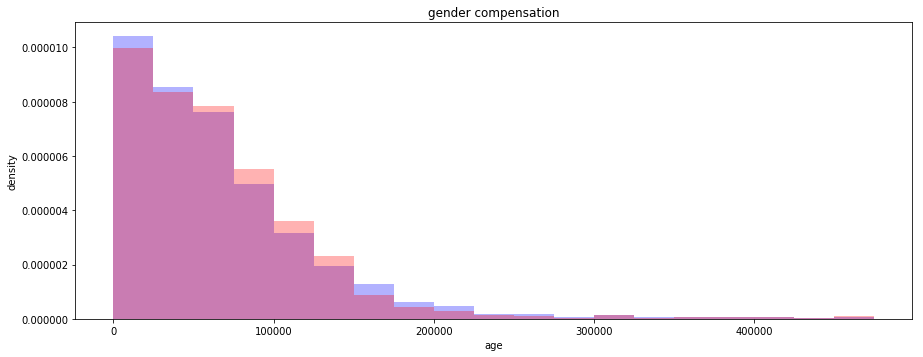

Statistics=126365590.000, p=0.261
gender compensation have same distribution (fail to reject H0)


In [103]:
# plot Major summaries for DS and non-DS

df_plotM = df[df['Gender'] == 'Man'].ConvertedComp
df_plotF = df[df['Gender'] == 'Woman'].ConvertedComp

fig = plt.figure(figsize=(15, 12))
xlabel_text = 'age'
ylabel_text = 'density'

# Plot them as a histogram.
title_text = 'gender compensation'
plt.subplot(2, 1, 1)
histM = plt.hist(df_plotM, density=True, color='blue',
                 bins=np.arange(0, 500000, 25000), alpha=.3)
# Plot them as a histogram.
histF = plt.hist(df_plotF, density=True, color='red',
                 bins=np.arange(0, 500000, 25000), alpha=.3)
plt.title(title_text)
plt.xlabel(xlabel_text)
plt.ylabel(ylabel_text)
plt.show()

# compare samples
stat, p = mannwhitneyu(df_plotM, df_plotF)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
    print(title_text + ' have same distribution (fail to reject H0)')
else:
    print(title_text + ' have different distribution (reject H0)')
    
    


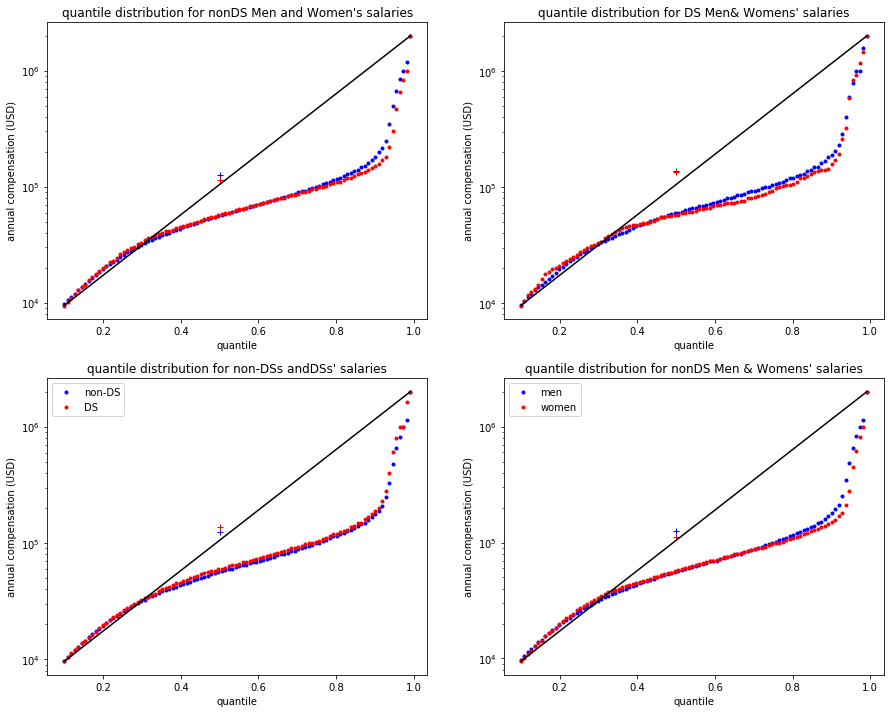

Statistics=231453516.000, p=0.336
DS and non-DS have same distribution (fail to reject H0)
Statistics=1546085.500, p=0.093
DS men and women have same distribution (fail to reject H0)


In [104]:

df_plotN = df[~df['isDS']].ConvertedComp
df_plotDS = df[df['isDS']].ConvertedComp

df_plotMn = df[(df['Gender'] == 'Man')&(~df['isDS'])].ConvertedComp
df_plotFn = df[(df['Gender'] == 'Woman')&(~df['isDS'])].ConvertedComp

df_plotMds = df[(df['Gender'] == 'Man')&(df['isDS'])].ConvertedComp
df_plotFds = df[(df['Gender'] == 'Woman')&(df['isDS'])].ConvertedComp


fig = plt.figure(figsize=(15, 12))
#fig = plt.figure(figsize=(10, 8))
#SOURCE_TEXT = 'Source: StackOverFlow Dev survey, 2019'
xlabel_text = 'quantile'
ylabel_text = 'annual compensation (USD)'
title_text = "quantile distribution for nonDS Men and Women's salaries"
plt.subplot(2,2,1)
currax = vis.plot_quantiles(df_plotM, df_plotF,ylabel_text,title_text)
#currax.set()

title_text = "quantile distribution for DS Men& Womens' salaries"
plt.subplot(2,2,2)
currax = vis.plot_quantiles(df_plotMds, df_plotFds,ylabel_text,title_text)
#currax.set()

title_text = "quantile distribution for non-DSs andDSs' salaries"
plt.subplot(2,2,3)
currax = vis.plot_quantiles(df_plotN, df_plotDS,ylabel_text,title_text)
plt.legend(('non-DS', 'DS'))

title_text = "quantile distribution for nonDS Men & Womens' salaries"
plt.subplot(2,2,4)
currax = vis.plot_quantiles(df_plotMn, df_plotFn,ylabel_text,title_text)
plt.legend(('men', 'women'))
plt.show()

# compare samples
stat, p = mannwhitneyu(df_plotN, df_plotDS)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
    print( 'DS and non-DS have same distribution (fail to reject H0)')
else:
    print( 'DS and non-DS  have different distribution (reject H0)')
    
# compare samples
stat, p = mannwhitneyu(df_plotMds, df_plotFds)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
if p > alpha:
    print('DS men and women have same distribution (fail to reject H0)')
else:
    print('DS men and women  have different distribution (reject H0)')

    

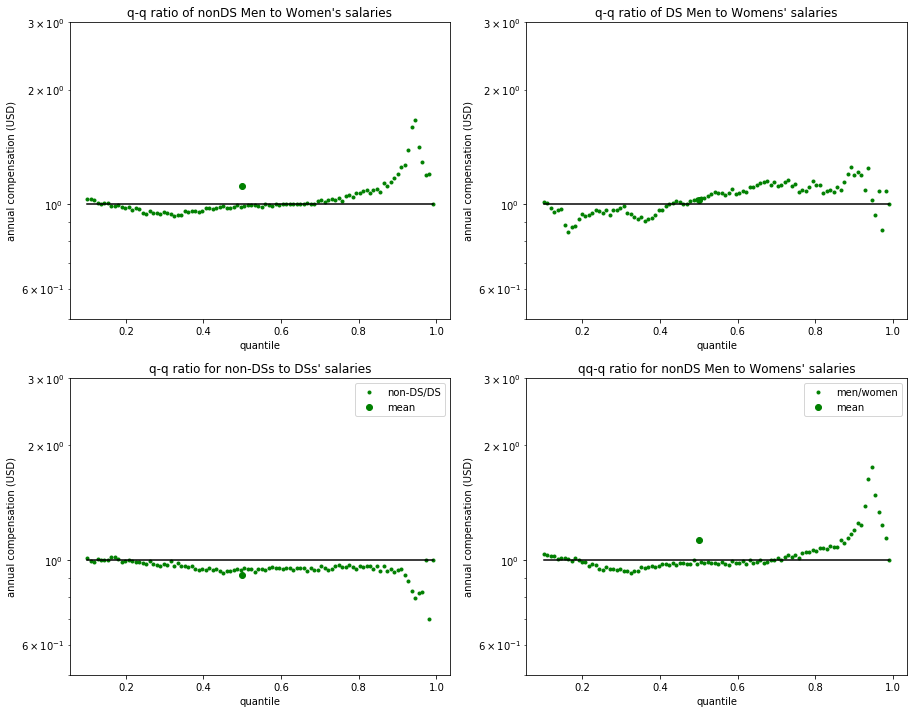

<function matplotlib.pyplot.ylim(*args, **kwargs)>

In [105]:
# another way to look at the differences in the distribution as ratios to deal with the extreme values at the top
fig = plt.figure(figsize=(15, 12))
#fig = plt.figure(figsize=(10, 8))
#SOURCE_TEXT = 'Source: StackOverFlow Dev survey, 2019'
xlabel_text = 'quantile'
ylabel_text = 'annual compensation (USD)'
title_text = "q-q ratio of nonDS Men to Women's salaries"
plt.subplot(2,2,1)
currax = vis.plot_quantiles2(df_plotM, df_plotF,ylabel_text,title_text)
#currax.set()

title_text = "q-q ratio of DS Men to Womens' salaries"
plt.subplot(2,2,2)
currax = vis.plot_quantiles2(df_plotMds, df_plotFds,ylabel_text,title_text)
#currax.set()

title_text = "q-q ratio for non-DSs to DSs' salaries"
plt.subplot(2,2,3)
currax = vis.plot_quantiles2(df_plotN, df_plotDS,ylabel_text,title_text)
plt.legend(('non-DS/DS', 'mean'))

title_text = "qq-q ratio for nonDS Men to Womens' salaries"
plt.subplot(2,2,4)
currax = vis.plot_quantiles2(df_plotMn, df_plotFn,ylabel_text,title_text)
plt.legend(('men/women', 'mean'))
plt.show()
plt.ylim

In [39]:
# seems like the incidence seems pretty gen-pop representative.. maybe higher bi than gay..
# might want to loook deeper at respondents who chose BOTH straight and Gay / Bi

100*df['Sexuality'].value_counts() / df.shape[0]

Straight / Heterosexual    80.993925
Bisexual                    3.553647
Gay or Lesbian              1.959530
Other                       0.758233
Name: Sexuality, dtype: float64

In [40]:
# almost 1% trans...
(100*df['Trans'].value_counts()/df.shape[0]).round()

No     94.0
Yes     1.0
Name: Trans, dtype: float64

In [41]:
# Looks like some of the multi-select sexuality identification are also "trans"
pd.concat([df.Sexuality[df['Trans'] == 'Yes'].value_counts().rename('Trans'),
           df.Sexuality[df['Trans'] == 'No'].value_counts().rename('notTrans'),
           (100*df.Sexuality[df['Trans'] == 'Yes'].value_counts()/df.Sexuality.value_counts()).rename('pctTrans')],
          axis=1).sort_values('notTrans', ascending=False)

,Trans,notTrans,pctTrans
Straight / Heterosexual,75,52388,0.140988
Bisexual,181,2060,7.754927
Gay or Lesbian,111,1154,8.624709
Other,51,421,10.240964


At 81% The proportion of heterosexuals in the data set seems to be lower than the 90-95% most from most gen-pop estimates across the  world https://en.wikipedia.org/wiki/Demographics_of_sexual_orientation

This may be because respondents were given some additonal options including multiple selections as well as non-traditional sexuality options.   1% of respondents identified as "Trans", which were espescially represented among non-hetero gender responders.

Most of our respondents --  ~25% -- are from the US, and the data scientists among them are even more likely from the US.

In [42]:
# Data Scientiest are even more likley to be from the US
pd.concat([(100*df['Country'].value_counts()/df.shape[0]).rename('all'),
           (100*df.loc[data_scientist, 'Country'].value_counts()/data_scientist.sum()).rename('DS')],
          axis=1, sort=True).sort_values('DS', ascending=False).head(30)

,all,DS
United States,24.513163,27.119275
India,10.135660,8.911506
Germany,6.461731,6.578131
United Kingdom,6.784513,5.647263
Canada,3.812482,3.711059
Brazil,2.303628,2.594018
France,2.678177,2.432667
Australia,2.181824,2.345786
Netherlands,2.073722,2.184436
Poland,2.260997,1.911381


----
## QUESTION #2:  Are Data Scientist's attitudes different?  

**Hypothesis:** More likely to be susceptible to the Dunning-Kruger Effect of overestimating you.  (But lets face it, the entier cohort of developers shows this in spades).

                 
We'll do a brief survey of Data Scientist attitudes with a few questions:
- personal assessment of competence (`ImpSyn`)
- extraversion
- want to be a manager 

Most of the other questions which probe personality attitudes seem to be consisten among ALL professional developres, e.g.: scareer and job satisfaction, how they feel about their manager, what factors they value in a job, how they view blockchain, and social media use.

                 

In [43]:
attitude_cols = ['ImpSyn', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobFactors',
                 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',  'SocialMedia', 'Extraversion',
                 'ScreenName', 'OpenSource']

,ImpSyn_NotDS,ImpSyn_DS,difference (~DS-DS)
Far below average,1.975046,2.332873,-0.357827
A little below average,7.224139,5.719303,1.504837
Average,24.291656,19.402985,4.888671
A little above average,45.896823,42.430704,3.466120
Far above average,20.612335,30.114135,-9.501800


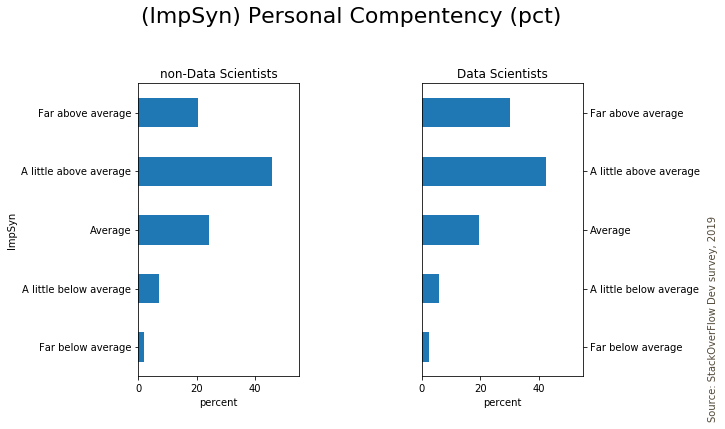

In [44]:
# plot ImpSyn ..
title_text = '(ImpSyn) Personal Compentency (pct)'
xlimit = {0, 55}
xlabel_text = 'percent'
ylabel_text = 'ImpSyn'
df_plot1 = 100*df.ImpSyn[df['notDS']].value_counts('mean', sort=False)
df_plot2 = 100*df.ImpSyn[df['isDS']].value_counts('mean', sort=False)
#df_plot2 = df_plot2[df_plot1.index]
vis.plot_2col(df_plot1, df_plot2, title_text, xlimit,
          xlabel_text, ylabel_text, 'barh')
# df_plot1.unstack(-1).plot.barh()
# df_plot1
pd.concat([df_plot1.rename('ImpSyn_NotDS'),
           df_plot2.rename('ImpSyn_DS'),
           (df_plot1-df_plot2).rename('difference (~DS-DS)')],
          axis=1)

Only 20% of data scientists consider themselves to be of "average" ability, and they are far more likely to say they are "far above average" competence than non- data scientiests.  Data scients seem to particularly suffer from the Dunning-Kruger Effect.

Data scientists also seem to have a slightly stronger preference for IRL vs on-line interaction compared to non- data scientists, which I hypothesize can be attributed to the age differences between the groups.  There should be a correlation.

In [45]:
# extraversion . better life
title_text = '(Extraversion) ---'
xlimit = {0, 80}
xlabel_text = 'percent'
ylabel_text = 'Extraversion'
df_plot1 = 100*df.Extraversion[df['notDS']].value_counts('mean', sort=False)
df_plot2 = 100*df.Extraversion[df['isDS']].value_counts('mean', sort=False)
#df_plot2 = df_plot2[df_plot1.index]
#plot_2col(df_plot1, df_plot2, title_text, xlimit, xlabel_text, ylabel_text,'barh')
# df_plot1.unstack(-1).plot.barh()
# df_plot1

pd.concat([df_plot1.rename('Extraversion_NotDS'),
           df_plot2.rename('Extraversion_DS'),
           (df_plot1-df_plot2).rename('difference (~DS-DS)')],
          axis=1)

,Extraversion_NotDS,Extraversion_DS,difference (~DS-DS)
In real life (in person),60.971048,63.022993,-2.051944
Neither,10.666714,10.566654,0.100060
Online,28.362238,26.410353,1.951885


In [46]:
# plot
title_text = '(MgrWant ---'
xlimit = {0, 55}
xlabel_text = 'percent'
ylabel_text = 'MgrWant'
df_plot1 = 100*df.MgrWant[df['notDS']].value_counts('mean', sort=False)
df_plot2 = 100*df.MgrWant[df['isDS']].value_counts('mean', sort=False)

pd.concat([df_plot1.rename('MgrWant_NotDS'),
           df_plot2.rename('MgrWant_DS'),
          (df_plot1-df_plot2).rename('difference (~DS-DS)')],
                 axis=1)

,MgrWant_NotDS,MgrWant_DS,difference (~DS-DS)
I am already a manager,3.778316,6.907841,-3.129524
No,34.466689,28.908168,5.558521
Not sure,36.895010,35.635947,1.259063
Yes,24.859985,28.548044,-3.688059


Data scientist are more likely to already be managers or want to be a manager, hypethetically attributable to having a longer career.  Lets ee how much experience thay have and what age they started coding.

In [47]:
# Looks like the middle 50% of people mostly work 40 hours weeks, but some extreme outliers exist...
pd.concat([df.nYearsPro[~df['isDS']].dropna().describe(percentiles=perc).rename('nYearsPro_NotDS'),
           (df.nYearsPro[df['isDS']].dropna().describe(percentiles=perc)).rename('nyearsPro_DS'),
           df.nAgeCode[~df['isDS']].dropna().describe(percentiles=perc).rename('nAgeCode_NotDS'),
           (df.nAgeCode[df['isDS']].dropna().describe(percentiles=perc)).rename('nAgeCode_DS')],
          axis=1)

,nYearsPro_NotDS,nyearsPro_DS,nAgeCode_NotDS,nAgeCode_DS
count,57100.000000,8009.000000,57041.000000,8002.000000
mean,7.934979,9.152582,15.369033,14.901337
std,7.291415,8.428424,4.639219,4.805443
min,0.000100,0.000100,4.500000,4.500000
10%,1.000000,2.000000,10.000000,9.000000
25%,3.000000,3.000000,12.000000,12.000000
50%,6.000000,6.000000,15.000000,15.000000
75%,11.000000,13.000000,18.000000,18.000000
90%,19.000000,21.000000,21.000000,20.000000
max,55.000000,55.000000,85.000000,85.000000


Not surprising, given the many older datascientists, there's a slight tendancy for data scientists to have been coding for a really long time, proba

----
## QUESTION #3:  Are Data Scientist's skills & work situations different?  

**Hypothesis:** We've seen that there are more older data scienteists, maybe these seasoned professionals are more likely to be mannagers and see their work functionally in terms of impact versus more declarative aspects of the job such as programming language, firm size or status, or developing envirnoment.


In [48]:
# respondents were able to select MULTIPLE factors
jobfact, jobfact_cols = dat.split_multiselect(df, 'JobFactors')

In [49]:
jobchal, jobchal_cols = dat.split_multiselect(df, 'WorkChallenge')

In [50]:
df_plot1 = (100*jobfact[~df['isDS']].mean()).sort_values(ascending=False)
sorted_index = df_plot1.index
df_plot2 = (100*jobfact[df['isDS']].mean())
df_plot2 = df_plot2[sorted_index]

pd.concat([df_plot1.rename('JobFact_NotDS'),
           df_plot2.rename('JobFact_DS'),
           (df_plot1-df_plot2).rename('difference (~DS-DS)')],
          axis=1)


,JobFact_NotDS,JobFact_DS,difference (~DS-DS)
"JobFactors_Languages,_frameworks,_and_other_technologies_I'd_be_working_with",57.926829,49.424856,8.501973
JobFactors_Office_environment_or_company_culture,49.190527,44.798700,4.391827
JobFactors_Flex_time_or_a_flexible_schedule,46.466949,44.573643,1.893306
JobFactors_Opportunities_for_professional_development,42.750088,42.910728,-0.160639
JobFactors_Remote_work_options,33.018735,32.258065,0.760670
JobFactors_How_widely_used_or_impactful_my_work_output_would_be,22.004242,28.882221,-6.877979
JobFactors_Financial_performance_or_funding_status_of_the_company_or_organization,13.639095,14.653663,-1.014568
JobFactors_Industry_that_I'd_be_working_in,13.329799,16.916729,-3.586931
JobFactors_Specific_department_or_team_I'd_be_working_on,11.461647,15.203801,-3.742154
JobFactors_Diversity_of_the_company_or_organization,6.481089,6.814204,-0.333115


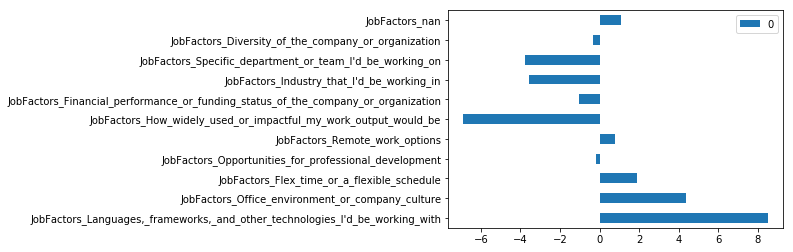

In [51]:
title_text = 'Job Factors'
xlimit = {0, 75}
ylabel_text = 'Language'
pd.DataFrame(df_plot1 - df_plot2).plot.barh()

There's an interesting split of data scientists valuing impact of the work, relative to non-DSs more liketly to value the "company culture/office environment" and technologies and frameworks used. 

In [52]:
df_plot1 = (100*jobchal[~df['isDS']].mean()).sort_values(ascending=False)
sorted_index = df_plot1.index
df_plot2 = (100*jobchal[df['isDS']].mean())
df_plot2 = df_plot2[sorted_index]

pd.concat([df_plot1.rename('JobChal_NotDS'),
           df_plot2.rename('JobChal_DS'),
           (df_plot1-df_plot2).rename('difference (~DS-DS)')],
          axis=1)


,JobChal_NotDS,JobChal_DS,difference (~DS-DS)
WorkChallenge_Distracting_work_environment,42.374016,38.748845,3.625171
WorkChallenge_Meetings,37.117027,35.673750,1.443277
WorkChallenge_Being_tasked_with_non-development_work,35.414923,38.735647,-3.320725
WorkChallenge_Not_enough_people_for_the_workload,33.407742,35.581365,-2.173622
WorkChallenge_Lack_of_support_from_management,26.606767,26.738815,-0.132047
WorkChallenge_Toxic_work_environment,21.143293,20.865778,0.277515
WorkChallenge_Time_spent_commuting,20.934948,20.258678,0.676270
WorkChallenge_Inadequate_access_to_necessary_tools,20.382462,23.835291,-3.452829
"WorkChallenge_Non-work_commitments_(parenting,_school_work,_hobbies,_etc.)",19.612330,20.324667,-0.712337
WorkChallenge_nan,6.707508,5.957552,0.749955


In [53]:
devenv, devenv_cols = dat.split_multiselect(df, 'DevEnviron')

VS code is the most popular environment, especially for non-data scientists.  Unsurprisingly python and R tools are much more likely to be used by data scientists.  VIM is also more popular among the presumably older cohort of data scientists. 

In [54]:
# how many environs do each respondent claim :  almost 3!!!
devenv.sum(axis=1).describe()


df_plot1 = (100*devenv[~df['isDS']].mean()).sort_values(ascending=False)
sorted_index = df_plot1.index
df_plot2 = (100*devenv[df['isDS']].mean())
df_plot2 = df_plot2[sorted_index]

pd.concat([df_plot1.rename('devenvNotDS'),
           df_plot2.rename('devenv_DS'),
           (df_plot1-df_plot2).rename('difference (~DS-DS)')],
          axis=1)



,devenvNotDS,devenv_DS,difference (~DS-DS)
DevEnviron_Visual_Studio_Code,54.036232,45.922585,8.113647
DevEnviron_Visual_Studio,32.003999,33.183014,-1.179015
DevEnviron_Notepad++,28.770102,34.723788,-5.953686
DevEnviron_IntelliJ,27.005840,24.539647,2.466193
DevEnviron_Vim,25.981656,30.239258,-4.257603
DevEnviron_Sublime_Text,23.016082,24.877865,-1.861784
DevEnviron_Android_Studio,16.090563,14.743831,1.346732
DevEnviron_Eclipse,13.181109,16.221972,-3.040863
DevEnviron_Atom,11.138002,14.656144,-3.518143
DevEnviron_Xcode,10.264639,8.543154,1.721485


## Language and Platform _FEELINGS_

- Love - use and want to continue next year
- Hate - use and want to stop next year
- Desire - don't use but want to next year

We believe we can undertand a lot from a developer by the languages they use and the tools they work with.
![alt text][logo]

[logo]:
https://intrepid-guewuklbkgvxhkhdo.stackpathdns.com/wp-content/uploads/2018/02/Inspirational-Language-Quotes-for-language-learners-1.jpg

Developers we both asked what languages/frameworks/databases they currently use -- and alowed to select multiple languages -- but also what languages they would like to use in the future.   This lets us infer feelings of "LOVE", "HATE", and "DESIRE" to the tools.

LOVE: if they use it and want to continue using it.
HATE: if they use it, but do NOT want to continue, and 
DESIRE: if they don't use it but want to start using it.


In [55]:
col = 'LanguageWorkedWith'
col_next = 'LanguageDesireNextYear'
prefix = 'Lang'
langs_df, Lang_cols = dat.split_multiselect_love_hate(df, col, col_next, prefix)

First, we can just look at raw incidence of language mentions.  For now and Javascript is the top dawg but losing steam (though the TypeScript and WebAssembly flavors are up and coming), and traditional HTML/CSS also seems to be on the decline.   Go and Python seem to be steadily growing in interest, with Go, Kotlin, Clojure, Rust and Dart seeming to have emerging interest.  

Now we need to look at what percentage of each language users LOVE, or HATE that language.  And what the raw percentage of non-users are interested in the language.

Lets plot as some horizontal bar graphs next to the raw incidence of language use for all Professionals and then with Developers and DataScientists broken out.



In [56]:
langs = langs_df.filter(regex='Lang_')
#langs = langs.merge(df['DSorDV'], how='outer', left_index=True, right_index=True)
# langs.groupby('DSorDV').mean()

In [58]:
lang_nds = (100*langs[~df['isDS']].mean()).sort_values(ascending=True)
sorted_index = lang_nds.index
lang_ds = (100*langs[df['isDS']].mean())
lang_ds = lang_ds[sorted_index]
lang_pct = lang_nds[sorted_index]

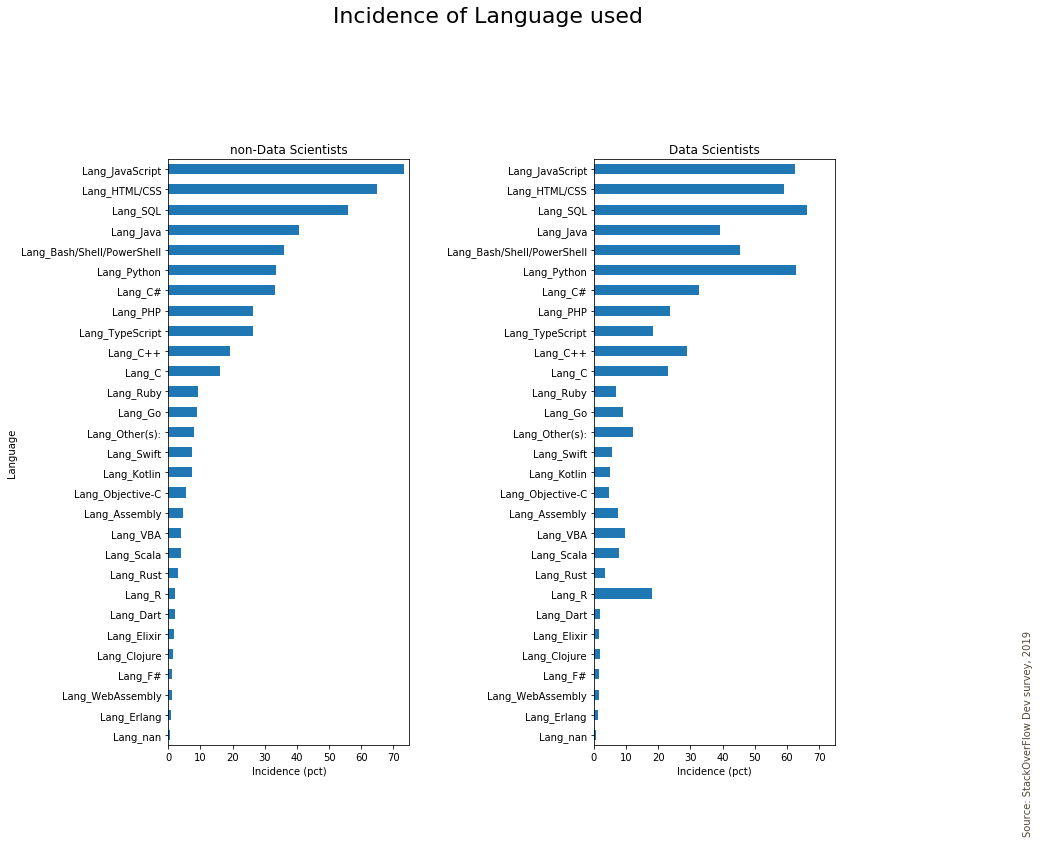

In [59]:
title_text = 'Incidence of Language used'
xlimit = {0, 75}
ylabel_text = 'Language'

vis.plot_notds_vs_ds(lang_nds, lang_ds, title_text, xlimit, ylabel_text)

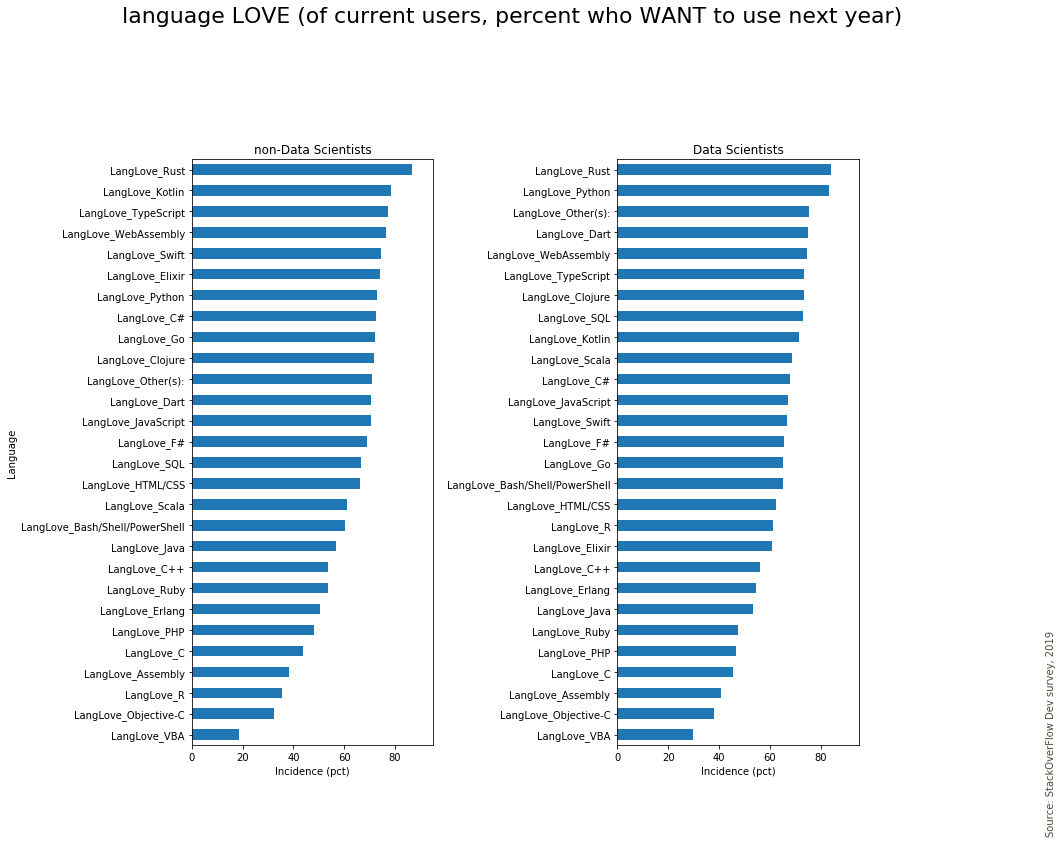

In [60]:
filt = langs_df.filter(regex='LangLove_')
love = filt.drop(columns='LangLove_nan')
love_dev = (100*love[~df['isDS']].mean()).sort_values(ascending=True)
love_ds = (100*love[df['isDS']].mean()).sort_values(ascending=True)
#love_ds = love_ds[love_dev.index]
title_text = 'language LOVE (of current users, percent who WANT to use next year)'

xlimit = {0, 95}
ylabel_text = 'Language'

vis.plot_notds_vs_ds(love_dev, love_ds, title_text, xlimit, ylabel_text)

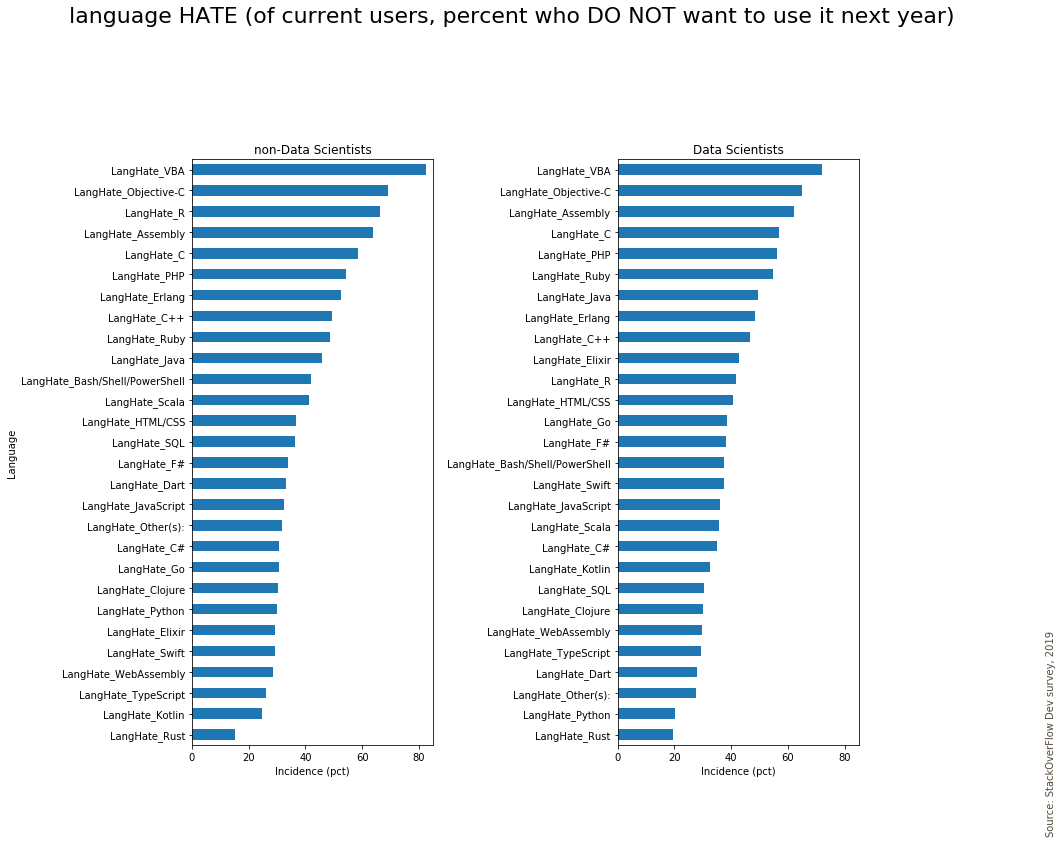

In [61]:
filt = langs_df.filter(regex='LangHate')
hate = filt.drop(columns='LangHate_nan')


hate_dev = (100*hate[~df['isDS']].mean()).sort_values(ascending=True)
hate_ds = (100*hate[df['isDS']].mean()).sort_values(ascending=True)

title_text = 'language HATE (of current users, percent who DO NOT want to use it next year)'

xlimit = {0, 85}
ylabel_text = 'Language'

vis.plot_notds_vs_ds(hate_dev, hate_ds, title_text, xlimit, ylabel_text)

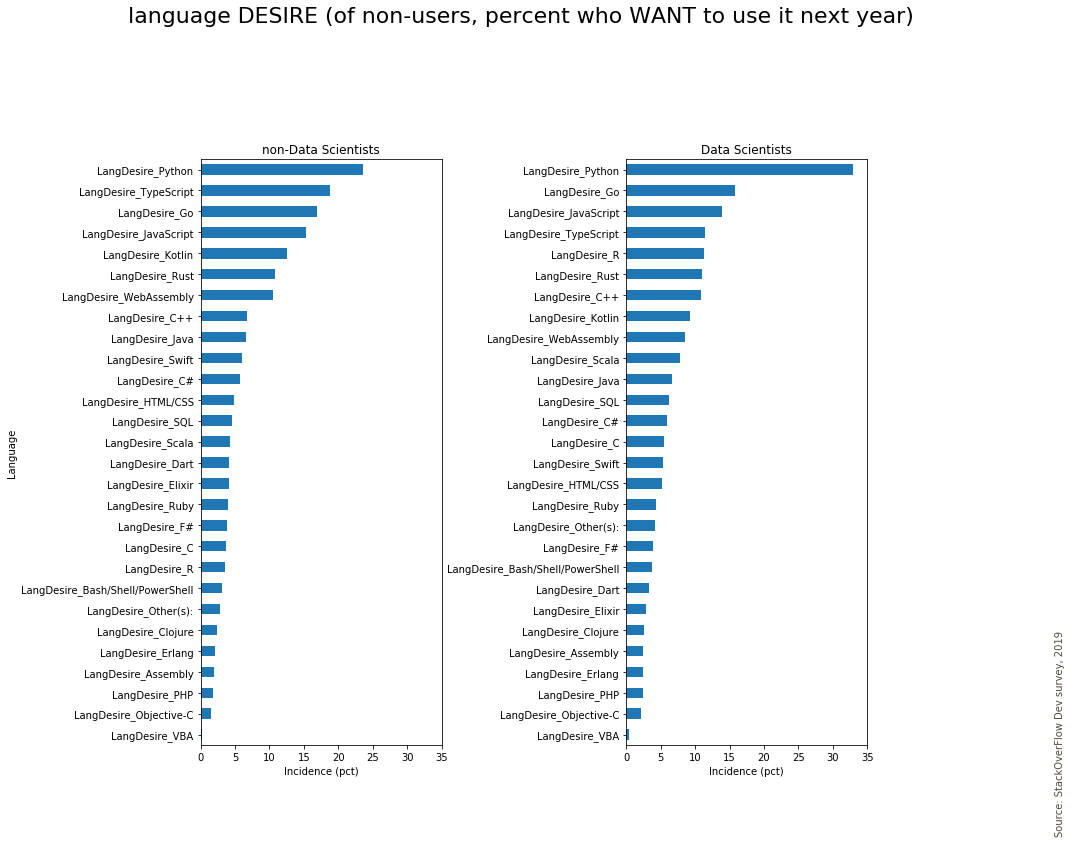

In [62]:
filt = langs_df.filter(regex='LangDesire')
desire = filt.drop(columns='LangDesire_nan')

des_dev = (100*desire[~df['isDS']].mean()).sort_values(ascending=True)
des_ds = (100*desire[df['isDS']].mean()).sort_values(ascending=True)

title_text = 'language DESIRE (of non-users, percent who WANT to use it next year)'

xlimit = {0, 35}
ylabel_text = 'Language'

vis.plot_notds_vs_ds(des_dev, des_ds, title_text, xlimit, ylabel_text)

Its interesting that among data scientists, the most _desired_ language is Python.  What do these respondents already code in?
Surprisingly, not a huge showing for R, but SQL is clearly ubiquitous.


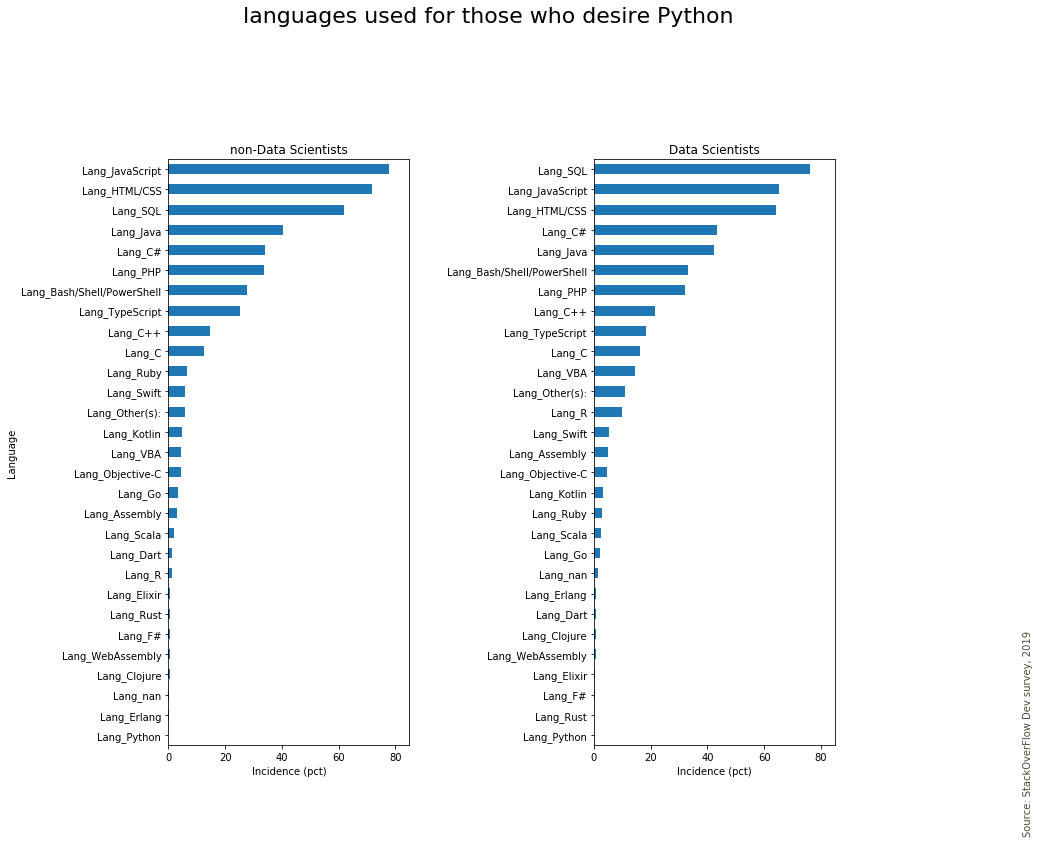

In [111]:
lans_desirePyDS = 100*langs[df['isDS']&desire['LangDesire_Python']].mean().sort_values(ascending=True)
lans_desirePynonDS = 100*langs[(~df['isDS'])&desire['LangDesire_Python']].mean().sort_values(ascending=True)

title_text = 'languages used for those who desire Python'

xlimit = {0, 85}
ylabel_text = 'Language'

vis.plot_notds_vs_ds(lans_desirePynonDS, lans_desirePyDS, title_text, xlimit, ylabel_text)


In [112]:
col = 'PlatformWorkedWith'
col_next = 'PlatformDesireNextYear'
prefix = 'Platform'
platform_df, Platform_cols = dat.split_multiselect_love_hate(
    df, col, col_next, prefix)

In [113]:
plats = platform_df.filter(regex='Platform_')
plats = plats.drop(columns='Platform_nan')

df_plot1 = plats[~df['isDS']]
df_plot2 = plats[df['isDS']]

df_plot1 = (100*df_plot1.mean()).sort_values(ascending=False)
sorted_index = df_plot1.index
df_plot2 = (100*df_plot2.mean())
df_plot2 = df_plot2[sorted_index]

pd.concat([df_plot1.rename(f'{col[0:5]}_NotDS'),
           df_plot2.rename(f'{col[0:5]}_DS'),
           (df_plot1-df_plot2).rename('difference (~DS-DS)')],
          axis=1)


,Platf_NotDS,Platf_DS,difference (~DS-DS)
Platform_Linux,51.438426,65.651773,-14.213346
Platform_Windows,47.698331,55.924608,-8.226277
Platform_Docker,35.465647,37.234744,-1.769096
Platform_AWS,29.482614,33.056544,-3.573930
Platform_Android,25.990491,24.858310,1.132181
Platform_MacOS,23.810944,25.240543,-1.429599
Platform_Slack,22.945838,23.975221,-1.029383
Platform_iOS,14.414095,11.546066,2.868030
Platform_WordPress,13.892048,13.931725,-0.039677
Platform_Microsoft_Azure,12.890836,15.025702,-2.134866


----
## QUESTION #4:  Can we predict if a developer professional developer is a Data Scientist?

**Hypothesis:** Encoded in the responses is a graph which tells us if a coder is a data scientist. 

This will be left for further investigation.  Features where we saw some variance between data scientists and non- data scientists should have predicitve power.  Finding features which are predicitve of data scientists would be useful for recruiters.

TO DO
- [ ] create list of features, X and use `isDS` as y.
- [ ] prepare the data... Test and Train sets . 
- [ ] Logistic Regression, non-neg PCA, random forests... etc. 






throw out everything except a simple df

# SUMMARY / NEXT STEPS 

StackOverFlow is probalby the top reference site for coding and development questions, and also has a significant social community built around it.   Therefore, its no surprise that their annual survey is able to deliver deep insights around coders.  Although the number of data scientists in their survey is not huge (~8000), we were able to learn that this group has some special charachteristics which set them apart from other coders, including a disproportional number of older more experienced coders.  The data scientists tend to have hard science and math backgrounds and higher levels of education, and higher pay.

Further inquire would answer qeustion #4 whereby logistic regression or other ML technique could automatically find data scientists among developers.   Also, because data scientists and traditional developers were NOT mutually exclusive we could further investigate the respondents who were both, or neither.  Statistical tests of our hypothesis could be developed.

In conclusion the hypothesis that data scientists are a special breed among developers seems to be reasonable.